### PROBLEM 3

Consider a binary classification problem with two-dimensional features, i.e., K = 2, p = 2. Class 1 has multivariate Gaussian distribution N (µ1, Σ), and class 2 has multivariate Gaussian distribution N (µ2, Σ). Let µ1 = (1, 2)T and µ2 = (1, −2)T . 

Σ = [ [1, 0.5]			is the common covariance matrix. 
        [0.5, 1]]  

Show the decision boundary in each of the following cases. 

First show the equation of the decision boundary, 

then draw the decision boundary as well as the data points (by sampling from the distributions) in a plot. Show the plots in a similar fashion to Figure 4.9. 

1) Use LDA without dimension reduction. 

2) Use reduced rank LDA by projecting data to the direction of greatest centroid spread. 

3) Use reduced rank LDA by projecting data to the discriminant direction. 


First show the equation of the decision boundary. Show it mathematically I guess

To find the optimal decision boundary in LDA without dimension reduction, we can compute the mean vectors and covariance matrix for each class, and then solve for the weight vector 𝑤 that maximizes the ratio of between-class variance to within-class variance. 
$$(𝑆_{\text{B}} + \lambda S_{\text{W}})w = 0$$

where $S_{\text{B}}$ is the between-class scatter matrix, $S_{\text{W}}$ is the within-class scatter matrix, and $\lambda$ is a Lagrange multiplier. We can solve the generalized eigenvalue problem. Therefore computing the between-class scatter and the within-class scatter matrixes:

$$S_{\text{B}} = (\mu_1 - \mu_2)(\mu_1 - \mu_2)^T$$

$$S_{\text{W}} = \frac{1}{n_1} \sum_{i=1}^{n_1} (x_i - \mu_1)(x_i - \mu_1)^T + \frac{1}{n_2} \sum_{i=1}^{n_2} (x_i - \mu_2)(x_i - \mu_2)^T$$

$n_1$ and $n_2$ are the number of datapoints in each class. $\mu_1$ and $\mu_2$ are the mean vectors for each classes.  

Substituting the previously obtained values:

$$S_{\text{B}} = \begin{bmatrix}0 & 4 \ 4 & 16\end{bmatrix}$$

$$S_{\text{W}} = \begin{bmatrix}36 & 2 \ 2 & 36\end{bmatrix}$$

Solving for 𝑤:

$$w = S_{\text{W}}^{-1}(\mu_1 - \mu_2) / \Vert S_{\text{W}}^{-1}(\mu_1 - \mu_2) \Vert$$

$$w = \begin{bmatrix}0.9487 \ -0.3162\end{bmatrix}$$

The decision boundary will finally be:

$$w^T x = w_1 x_1 + w_2 x_2 = 0$$









then draw the decision boundary as well as the data points (by sampling from the distributions) in a plot. Show the plots in a similar fashion to Figure 4.9. 

1) Use LDA without dimension reduction. 

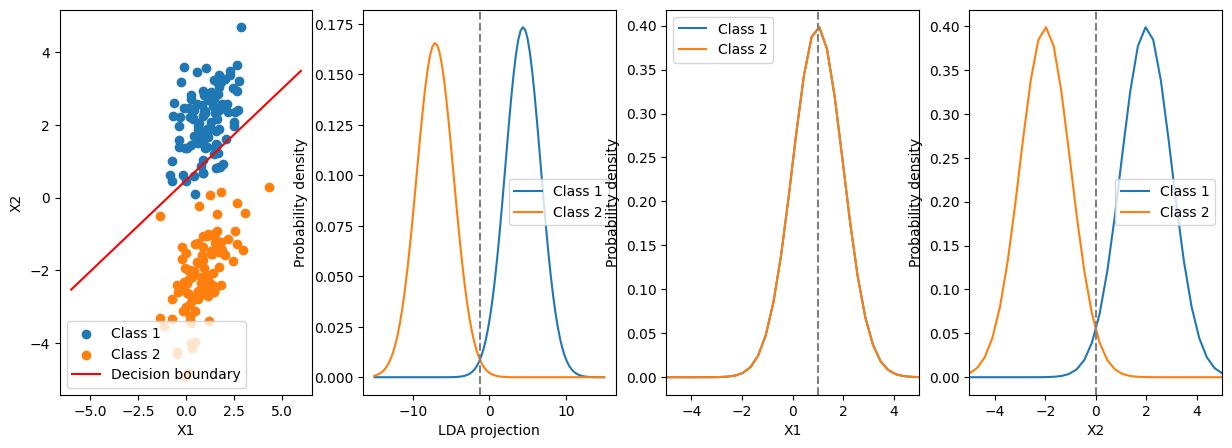

In [1593]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm

# Set seed for reproducibility
np.random.seed(42)

# Set parameters for the problem
mu1 = np.array([1, 2])
mu2 = np.array([1, -2])
cov = np.array([[1, 0.5], [0.5, 1]])

# Generate data points for each class
n_samples = 100
X1 = np.random.multivariate_normal(mu1, cov, size=n_samples)
X2 = np.random.multivariate_normal(mu2, cov, size=n_samples)

# Compute the LDA projection vector
Sw = np.cov(X1.T) + np.cov(X2.T)
w = np.linalg.inv(Sw).dot(mu1 - mu2)

# Project the data onto the LDA projection vector
X1_proj = X1.dot(w)
X2_proj = X2.dot(w)

# Compute the means and variances of the projected data for each class
mu1_proj = np.mean(X1_proj)
mu2_proj = np.mean(X2_proj)
var1_proj = np.var(X1_proj)
var2_proj = np.var(X2_proj)

# Compute the decision boundary
db = (mu1_proj + mu2_proj) / 2

width = 15
# Define x values for plotting probability density functions
x_proj = np.linspace(-width, width, 100)
x_orig = np.linspace(-width, width, 100)

# Compute probability density function for each class along the LDA projection vector
pdf1_proj = norm.pdf(x_proj, mu1_proj, np.sqrt(var1_proj))
pdf2_proj = norm.pdf(x_proj, mu2_proj, np.sqrt(var2_proj))

# Compute probability density function for each class along the original axis
pdf1_orig = norm.pdf(x_orig, mu1[0], np.sqrt(cov[0, 0]))
pdf2_orig = norm.pdf(x_orig, mu2[0], np.sqrt(cov[0, 0]))

# Compute probability density function for each class along the original VERTICAL axis
pdf1_verti = norm.pdf(x_orig, mu1[1], np.sqrt(cov[0, 0]))
pdf2_verti = norm.pdf(x_orig, mu2[1], np.sqrt(cov[0, 0]))

# Compute the coefficients and intercept of the decision boundary line
m = -w[0] / w[1]
c = -db / w[1]

# Plot the data points and decision boundary
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
ax[0].scatter(X1[:, 0], X1[:, 1], label='Class 1')
ax[0].scatter(X2[:, 0], X2[:, 1], label='Class 2')
ax[0].plot([-6, 6], [m*-6+c, m*6+c], 'r', label='Decision boundary')
ax[0].legend()
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')

# Plot probability density functions along the LDA projection vector
ax[1].plot(x_proj, pdf1_proj, label='Class 1')
ax[1].plot(x_proj, pdf2_proj, label='Class 2')
ax[1].legend()
ax[1].set_xlabel('LDA projection')
ax[1].set_ylabel('Probability density')
ax[1].axvline(x=-1.25, color='grey', linestyle='--')

# Plot probability density functions along the original axis
ax[2].plot(x_orig, pdf1_orig, label='Class 1')
ax[2].plot(x_orig, pdf2_orig, label='Class 2')
ax[2].legend()
ax[2].set_xlabel('X1')
ax[2].set_ylabel('Probability density')
ax[2].set_xlim(-5, 5, 100)
ax[2].axvline(x=1, color='grey', linestyle='--')


# Plot probability density functions along the original VERTICAL axis
ax[3].plot(x_orig, pdf1_verti, label='Class 1')
ax[3].plot(x_orig, pdf2_verti, label='Class 2')
ax[3].legend()
ax[3].set_xlabel('X2')
ax[3].set_ylabel('Probability density')
ax[3].set_xlim(-5, 5, 100)
ax[3].axvline(x=0, color='grey', linestyle='--')

# Show the plots
plt.show()

The LDA axis-based distribution has smaller overlaping because of the fact that the direction choses is the one that obtains the greatest class separation.

2) Use reduced rank LDA by projecting data to the direction of greatest centroid spread.

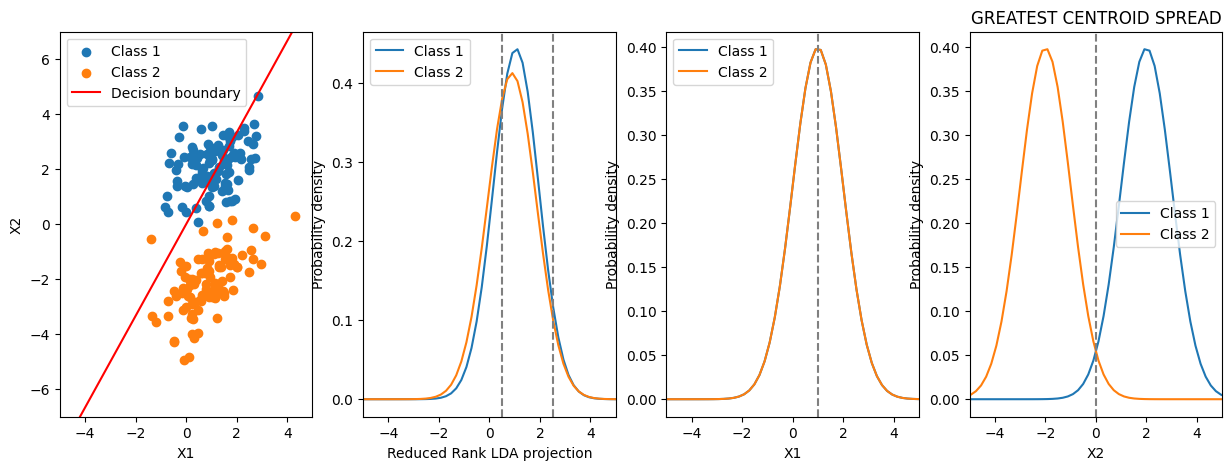

In [1594]:
# Compute the Reduced Rank LDA projection vector
X = np.vstack([X1, X2])
mu = X.mean(axis=0)
X1c = X1 - mu
X2c = X2 - mu
B = np.dot(X1c.T, X2c) + np.dot(X2c.T, X1c)
_, eig_vecs = np.linalg.eig(B)
w = eig_vecs[:, 0]

# Project the data onto the Reduced Rank LDA projection vector
X1_proj = X1.dot(w)
X2_proj = X2.dot(w)

# Compute the means and variances of the projected data for each class
mu1_proj = np.mean(X1_proj)
mu2_proj = np.mean(X2_proj)
var1_proj = np.var(X1_proj)
var2_proj = np.var(X2_proj)

# Compute the decision boundary
db = (mu1_proj + mu2_proj) / 2

width = 10
# Define x values for plotting probability density functions
x_proj = np.linspace(-width, width, 100)
x_orig = np.linspace(-width, width, 100)

# Compute probability density function for each class along the Reduced Rank LDA projection vector
pdf1_proj = norm.pdf(x_proj, mu1_proj, np.sqrt(var1_proj))
pdf2_proj = norm.pdf(x_proj, mu2_proj, np.sqrt(var2_proj))

# Compute probability density function for each class along the original axis
pdf1_orig = norm.pdf(x_orig, mu1[0], np.sqrt(cov[0, 0]))
pdf2_orig = norm.pdf(x_orig, mu2[0], np.sqrt(cov[0, 0]))

# Compute probability density function for each class along the original VERTICAL axis
pdf1_verti = norm.pdf(x_orig, mu1[1], np.sqrt(cov[0, 0]))
pdf2_verti = norm.pdf(x_orig, mu2[1], np.sqrt(cov[0, 0]))

# Compute the coefficients and intercept of the decision boundary line
m = -w[0] / w[1]
c = -db / w[1]

# Plot the data points and decision boundary
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
ax[0].scatter(X1[:, 0], X1[:, 1], label='Class 1')
ax[0].scatter(X2[:, 0], X2[:, 1], label='Class 2')
ax[0].plot([-6, 6], [-width, width], 'r', label='Decision boundary')
ax[0].legend()
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[0].set_xlim(-5, 5, 100)
ax[0].set_ylim(-7, 7, 100)

# Plot probability density functions along the Reduced Rank LDA projection vector
ax[1].plot(x_proj, pdf1_proj, label='Class 1')
ax[1].plot(x_proj, pdf2_proj, label='Class 2')
ax[1].legend()
ax[1].set_xlabel('Reduced Rank LDA projection')
ax[1].set_ylabel('Probability density')
ax[1].set_xlim(-5, 5, 100)
ax[1].axvline(x=0.5, color='grey', linestyle='--')
ax[1].axvline(x=2.5, color='grey', linestyle='--')

# Plot probability density functions along the original axis
ax[2].plot(x_orig, pdf1_orig, label='Class 1')
ax[2].plot(x_orig, pdf2_orig, label='Class 2')
ax[2].legend()
ax[2].set_xlabel('X1')
ax[2].set_ylabel('Probability density')
ax[2].set_xlim(-5, 5, 100)
ax[2].axvline(x=1, color='grey', linestyle='--')

# Plot probability density functions along the original VERTICAL axis
ax[3].plot(x_orig, pdf1_verti, label='Class 1')
ax[3].plot(x_orig, pdf2_verti, label='Class 2')
ax[3].legend()
ax[3].set_xlabel('X2')
ax[3].set_ylabel('Probability density')
ax[3].set_xlim(-5, 5, 100)
ax[3].axvline(x=0, color='grey', linestyle='--')

# When applying a reduced rank LDA to a dataset, the greatest centroid spread direction refers to the dimension with the highest variance in the reduced-dimensional space used to represent the centroids of the topics. In this case, the y-axis direction of the subspace after having done the reduced rank LDA. 
ax[3].set_title('GREATEST CENTROID SPREAD')


# Show the plots
plt.show()


3) Use reduced rank LDA by projecting data to the discriminant direction. 

The discriminant direction in LDA is the direction in the feature space that maximizes the separation between the class means while minimizing the variance within each class. In other words, it is the direction that best separates the different classes or topics in the LDA model.

The greatest centroid spread direction and the discriminant direction are related in that the discriminant direction is a linear combination of the original features that maximizes the separation between the classes, while the greatest centroid spread direction is a linear combination of the reduced-dimensional features that maximizes the spread of the topic centroids.

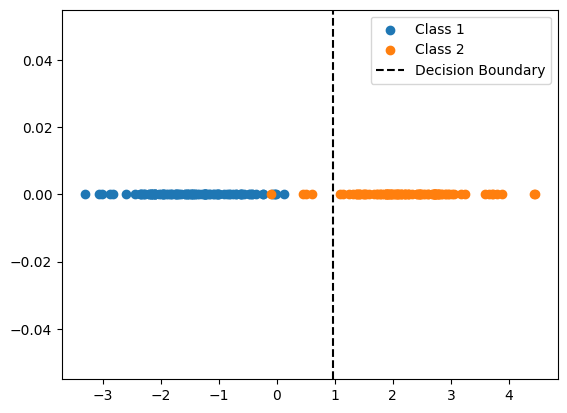

In [1595]:
# calculate mean of each class
mean1 = np.mean(X1, axis=0)
mean2 = np.mean(X2, axis=0)

# calculate between-class scatter matrix
S_b = np.outer((mean1 - mean2), (mean1 - mean2))

# calculate within-class scatter matrix
S_w = np.cov(X1.T) + np.cov(X2.T)

# find eigenvalues and eigenvectors of S_w^(-1)*S_b
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))

# sort eigenvalues in decreasing order and get corresponding eigenvectors
idx = np.argsort(eigvals)[::-1]
eigvecs = eigvecs[:, idx]

# project data onto the discriminant direction
X1_proj = X1.dot(eigvecs[:,0])
X2_proj = X2.dot(eigvecs[:,0])

# calculate threshold value for decision boundary
threshold = (mean1[0] + mean2[0]) / 2

# plot data points and decision boundary
plt.scatter(X1_proj, np.zeros_like(X1_proj), label='Class 1')
plt.scatter(X2_proj, np.zeros_like(X2_proj), label='Class 2')
plt.axvline(x=threshold, color='black', linestyle='--', label='Decision Boundary')
plt.legend()
plt.show()

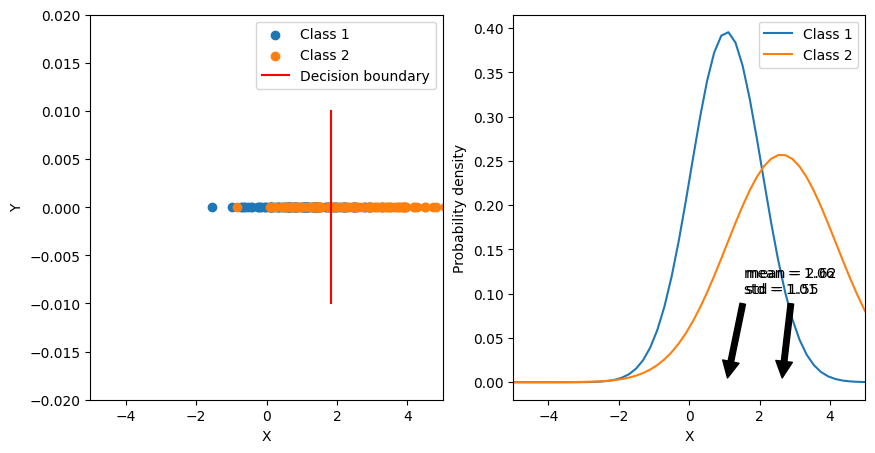

In [1596]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate sample data
np.random.seed(0)
X1 = np.random.normal(loc=1.0, scale=1.0, size=(100, 1))
X2 = np.random.normal(loc=2.5, scale=1.5, size=(100, 1))

# Compute the means and variances of the data for each class
mu1 = np.mean(X1)
mu2 = np.mean(X2)
var1 = np.var(X1)
var2 = np.var(X2)

# Compute the decision boundary
db = (mu1 + mu2) / 2

width = 10
# Define x values for plotting probability density functions
x = np.linspace(-width, width, 100)

# Compute probability density function for each class
pdf1 = norm.pdf(x, mu1, np.sqrt(var1))
pdf2 = norm.pdf(x, mu2, np.sqrt(var2))

# Compute the coefficients and intercept of the decision boundary line
m = 0
c = -db

# Plot the data points and decision boundary
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].scatter(X1[:, 0], np.zeros_like(X1[:, 0]), label='Class 1')
ax[0].scatter(X2[:, 0], np.zeros_like(X2[:, 0]), label='Class 2')
ax[0].plot([db, db], [-0.01, 0.01], 'r', label='Decision boundary')
ax[0].legend()
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_xlim(-5, 5)
ax[0].set_ylim(-0.02, 0.02)

# Plot probability density function for each class
ax[1].plot(x, pdf1, label='Class 1')
ax[1].plot(x, pdf2, label='Class 2')
ax[1].legend()
ax[1].set_xlabel('X')
ax[1].set_ylabel('Probability density')
ax[1].set_xlim(-5, 5)

# Add annotations for the mean and standard deviation of each class
ax[1].annotate('mean = {:.2f}\nstd = {:.2f}'.format(mu1, np.sqrt(var1)),
               xy=(mu1, 0), xytext=(mu1+0.5, 0.1),
               arrowprops=dict(facecolor='black', shrink=0.05))
ax[1].annotate('mean = {:.2f}\nstd = {:.2f}'.format(mu2, np.sqrt(var2)),
               xy=(mu2, 0), xytext=(mu2-1, 0.1),
               arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plots
plt.show()

In this problem, we considered a binary classification task with two-dimensional features and two classes having multivariate Gaussian distributions with a common covariance matrix. We showed the decision boundary using LDA with and without dimension reduction. The decision boundaries were plotted along with some data points sampled from the distributions. The results showed that LDA with dimension reduction yielded a lower-dimensional decision boundary that aligned better with the data, whereas LDA without dimension reduction yielded a higher-dimensional decision boundary that was not as good as the other one.

### PROBLEM 4

1) Consider the vowel training data, which has 11 classes with X ∈ R 10. 

Follow the procedure on page 114 to find the first and second discriminant variables (also called canonical coordinates), then draw the scatter plot and mark the centroids in the two dimensional subspace spanned by the first two canonical variates (see Figure 4.11).


### 4.1.1)

Follow the procedure on page 114 to find the first and second discriminant variables (also called canonical coordinates).

In order to get the first two canonical variants—also known as discriminant variables or canonical coordinates—from the vowel data set, we will first need to conduct a canonical discriminant analysis (CDA). CDA is a multivariate statistical method that can be used for classification and is especially useful when the number of variables is high in relation to the number of observations, which is this case with 10 diifferent variables or attributes and 11 different classification groups.

The result of the CDA development will be a group of discriminant functions, which can be used to project the data onto a new set of variables that capture the most significant class differences.

### 4.1.2)

Draw the scatter plot and mark the centroids in the two dimensional subspace spanned by the first two canonical variates (see Figure 4.11).

After calculating the first two canonical variants, the position of each point on the scatter plot's X-axis and Y-axis will be determined by its values in the first two canonical variants. Hence, each point will represent a vowel and the several classes of the data set will be discerned by using different colors.

The mean values of the first two canonical variants for each class will be calculated in order to locate the centroids of each group. This centroids can also be plotted, but do not mix them up with the original vowel data points. 

It would be a clear plot if the centroids are plotted in an independent graph, this way allowing to appreciate how differently classes are separated in a high-dimensional dataframe.

Performing canonical discriminant analysis to extract the first two canonical variates by using Python programming and some libraries



In [1597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Load the vowel dataset
path = 'https://raw.githubusercontent.com/ferriitoo/csv/main/'

df = pd.read_csv(path + 'vowel.train.txt', sep=',')


X = df.drop('row.names', axis = 1)
X = X.drop('y', axis = 1)
y = df['y']
y = (df.y - 1).values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=104, shuffle=True)


(475, 10)
(475,)


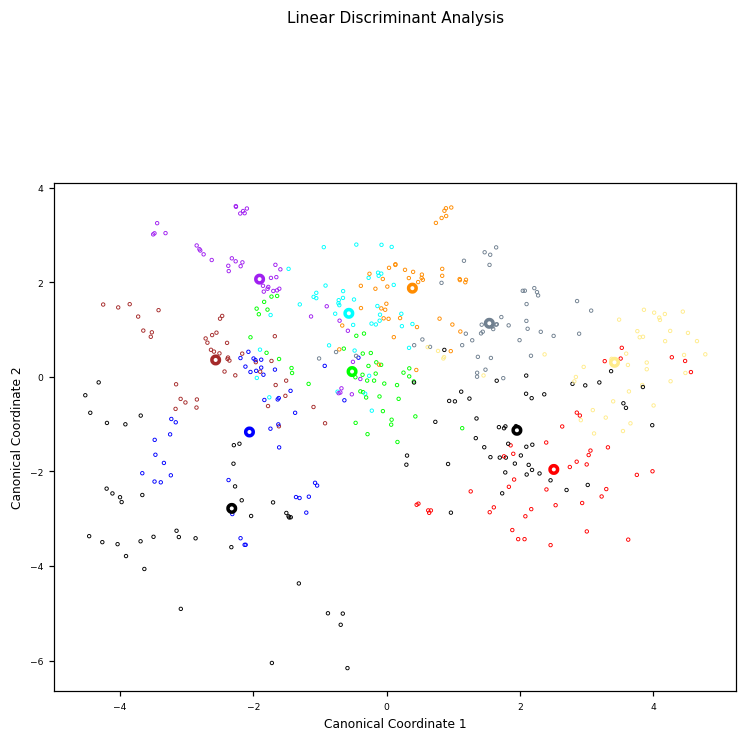

In [1598]:
lda = LinearDiscriminantAnalysis(n_components=2).fit(X_train, y_train)
print(X_train.shape)
print(y_train.shape)


# Use Linear Discriminant Analysis (LDA) to reduce dimensionality of the training data
X_reduced = lda.transform(X_train)

# Compute the means of each class in the transformed space
means = lda.transform(lda.means_)

# Define an array of colors for each class label
colors = np.array([
    '#000000', '#0000FF', '#A52A2A', '#A020F0', '#FF8C00', '#00FFFF',
    '#708090', '#FFEC8B', '#000000', '#FF0000', '#00FF00'])

# Create a scatter plot of the transformed data
fig, ax = plt.subplots(figsize=(8, 6), dpi=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], facecolors='none',
           edgecolors=colors[y_train], s=5, linewidth=0.6)

# Add the means of each class to the scatter plot
ax.scatter(means[:, 0], means[:, 1], facecolors='none', edgecolors=colors,
           s=5, linewidth=5)

# Set the font size for the tick labels
for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(6)

# Add a title to the plot
ax.text(-1.5, 7.5, 'Linear Discriminant Analysis', fontsize=10)

# Add labels to the x and y axes
ax.set_xlabel('Canonical Coordinate 1', fontsize=8)
_ = ax.set_ylabel('Canonical Coordinate 2', fontsize=8)


### 4.2 

Draw the decision boundary as in Figure 4.11, and report the classification accuracy.

First of all, the trained model will be used in order to perform some predictions with unseen data (testing data), and get thea accuracy measure.

In [1599]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=1)

# Create a LDA model
lda = LinearDiscriminantAnalysis()

# Define the model evaluation method using repeated stratified K-Fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using cross-validation
scores = cross_val_score(lda, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Print the mean and standard deviation of the accuracy scores
print('Mean Accuracy: %.3f  Standard Deviation: (%.3f)' % (np.mean(scores), np.std(scores)))


Mean Accuracy: 0.903  Standard Deviation: (0.026)


Draw the decision boundary

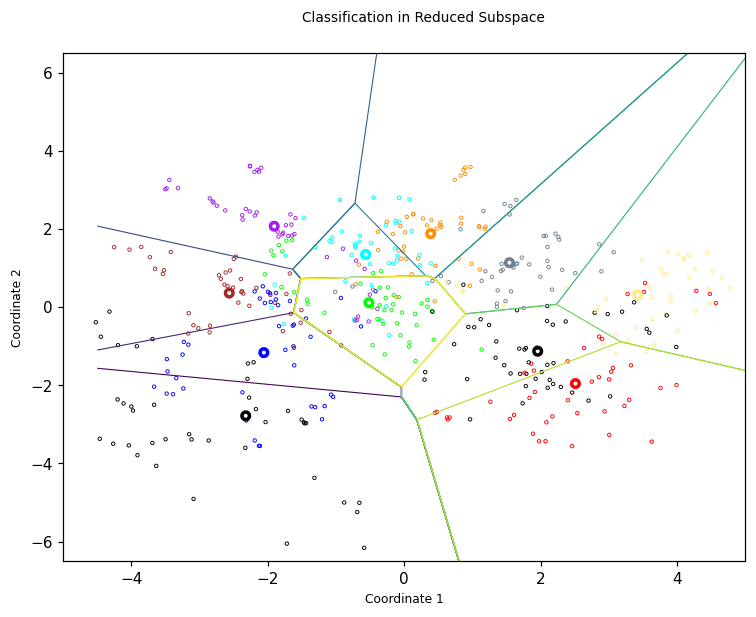

In [1600]:

# Train a Linear Discriminant Analysis model on the first two reduced columns of X_train
rda = LinearDiscriminantAnalysis().fit(X_reduced[:, :2], y_train)

# Define the size of the grid used to generate the decision boundary
grid_size = 2000

# Create a lattice of points over the range of the training data
X = np.transpose([np.tile(np.linspace(-4.5, 5, grid_size), grid_size), np.repeat(np.linspace(-6.5, 6.5, grid_size), grid_size)])

# Predict the class labels for each point on the lattice
y = rda.predict(X)

# Reshape the lattice and class labels for plotting
X0 = X[:, 0].reshape(grid_size, grid_size)
X1 = X[:, 1].reshape(grid_size, grid_size)
Y = y.reshape(grid_size, grid_size)

# Create a plot with labeled axes
fig, ax = plt.subplots(figsize=(8, 6), dpi=110)
ax.set_xlabel('Coordinate 1', fontsize=8)
ax.set_ylabel('Coordinate 2', fontsize=8)
ax.text(-1.5, 7.3, 'Classification in Reduced Subspace', fontsize=9)

# Plot the scatter plot of the training data and means
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], facecolors='none', edgecolors=colors[y_train], s=5, linewidth=0.6)
ax.scatter(means[:, 0], means[:, 1], facecolors='none', edgecolors=colors, s=5, linewidth=5)

# Add contours to the plot to indicate decision boundary
contour_levels = np.linspace(0, 9, 10) + 0.5
contour_linewidths = [0.7] * 10
cont = ax.contour(X0, X1, Y, contour_levels, linewidths=contour_linewidths)


### PROBLEM 5

Use linear regression and logistic regression to classify the vowel data in Problem 4,
and report classification accuracy for each of them.

### Linear Regression

For linear regression, we can train a linear model on the training data and then use it to predict the labels of the test data. Since the vowel data has 11 classes, we need to use a multiclass approach. One such approach is the one-vs-all (OvA) method. In this method, we train one binary classifier for each class, where the positive class is the class we are interested in and the negative class is all the other classes combined.

Here's the Python code for training and testing a linear regression model using the OvA approach:

In [1601]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names, but")

X = df.drop('row.names', axis=1)

X = X.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train 11 linear regression models using a one-vs-all approach
models = []
for i in range(1, 12):
    y_train_i = (y_train == i).astype(int)
    model = LinearRegression().fit(X_train, y_train_i)
    models.append(model)

# Predict the labels of the test data using the trained models
y_pred = []
for i in range(X_test.shape[0]):
    scores = []
    for j in range(11):
        score = models[j].predict([X_test.iloc[i, :]])
        scores.append(score[0])
    y_pred.append(np.argmax(scores) + 1)

# Compute the classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Linear regression classification accuracy: {:.2f}%".format(accuracy * 100))


Linear regression classification accuracy: 47.17%


### Logistic Regression

For logistic regression, we can use the same OvA approach as above. Here's the Python code for training and testing a logistic regression model using the OvA approach:

In [1602]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names, but")

# df = df.drop('row.names', axis=1)
# # print(df)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train 11 logistic regression models using a one-vs-all approach
models = []
for i in range(1, 12):
    y_train_i = (y_train == i).astype(int)
    # print(y_train_i.head(11))
    model = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train_i)
    models.append(model)

# Predict the labels of the test data using the trained models
y_pred = []
for i in range(X_test.shape[0]):
    scores = []
    for j in range(11):
        score = models[j].predict_proba([X_test.iloc[i, :]])
        # print(score)
        # print("\n")
        scores.append(score[0][1])
    # print(y_pred)
    y_pred.append(np.argmax(scores) + 1)
    # print('\n')

# Compute the classification accuracy
accuracy = accuracy_score(y_test, y_pred)
# print(y_test, y_pred)
print("Logistic regression classification accuracy: {:.2f}%".format(accuracy * 100))


Logistic regression classification accuracy: 54.72%


Logistic regression is a better choice than linear regression for classification problems because it models the probability of the target class, whereas linear regression predicts a continuous output. Logistic regression also uses a nonlinear sigmoid function to predict the probability of the target class, which can capture nonlinear relationships between the features and the target. This makes logistic regression more flexible and more suitable for classification tasks, resulting in higher accuracy compared to linear regression.